In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing Distributions of Data ([Seaborn Docs](https://seaborn.pydata.org/tutorial/distributions.html))

*In statistics and probability theory, a distribution refers to the way the values in a dataset are spread or distributed over the entire range of possible values.*

Before delving into data analysis or modeling, it's crucial to get a clear picture of how the different variables in your dataset are spread out. Visualizing these distributions can swiftly answer important questions such as: 

- What's the span of values covered by the data?
- What's the central tendency? i.e, where do most of the data points tend to cluster?
- Is the data heavily skewed to one direction?
- Is there any evidence for bimodality?
- Are there significant outliers? etc.

Distribution plots are used for showing possible values or intervals of the data (usually in the x axis) and how often they occur (usually along the y axis). 

These types of charts can reveal the minimum and maximum values, median, outliers, frequency, and probability densities.

- <i> **Questions:**
1. What are the highest, middle, and lowest values?
2. Does one thing stand out from the rest?
3. What does the shape of the data look like?

- **Insight:** use distributions charts to reveal outliers, the shape of the distribution (verify if the data really represents a known distribution), frequencies, range of values, minimum value, maximum value, and the median.

- **Data:** univariate or a single numeric variable (type of data that involves observations or measurements on a single characteristic or variable).

- **Chart options:** histogram, density plot, and a boxplot. </i>

## **Histograms**

Histograms show frequencies of a single variable grouped into bins or frequency ranges on the x-axis. The y-axis of the histogram shows the frequency count or percentage.

**Notes:**
- A large bin size can obscure the data.
- Adjust the size of the bins to best reveal the shape of the frequency distribution. 

The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution.

> The `seaborn.histplot(data=None, x=None, y=None, hue=None, multiple='layer', stat='count', element='bars', bins='auto', fill=True, kde=False, palette=None, color=None, legend=True, ax=None, **kwargs)` function is used for binnning the observations, count them and visualizing the histogram. It can also be used optionally to normalize or cumulate the observations when plotting. See the documentation at, https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot for more details.

<u>Function Parameters</u>

- `data:` Dataframe
- `x, y:` Vectors or keys in data. Variables that specify positions on the x and y axes. Only specify x to have the bins in the x axis and only specify y to have a horizontal histogram (if that makes any sense). If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column.
- `hue:` Vector or key in data. Semantic variable that is mapped to determine the color of plot elements.
- `multiple{“layer”, “dodge”, “stack”, “fill”}:` Approach to resolving multiple elements when semantic mapping creates subsets. 
- `stat:` Aggregate statistic to compute in each bin.
    - count: show the number of observations in each bin (default).
    - frequency: show the number of observations divided by the bin width.
    - probability or proportion: normalize such that bar heights sum to 1.
    - percent: normalize such that bar heights sum to 100.
    - density: normalize such that the total area of the histogram equals 1.
- `element{“bars”, “step”, “poly”}:` Visual representation of the histogram statistic.
- `bins:` Can be a str, number (the number of bins), vector (the breaks of the bins), or a pair of such values.
- `kde:` If True, compute a kernel density estimate to smooth the distribution and show on the plot as one or more line(s).
- `kde_kws:` Parameters passed to sns.kdeplot().

In [9]:
data = sns.load_dataset("penguins")

In [4]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

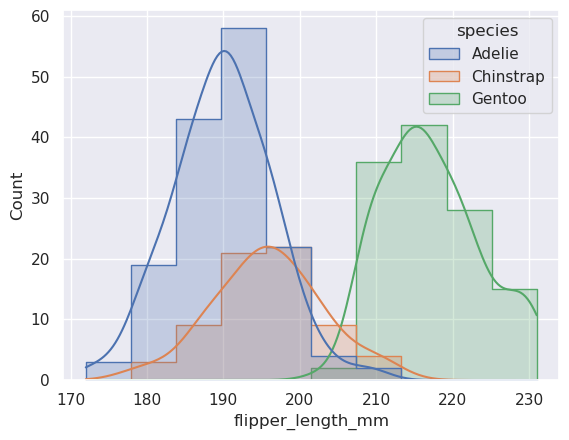

In [14]:
sns.histplot(data, x="flipper_length_mm", hue="species", element="step", kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

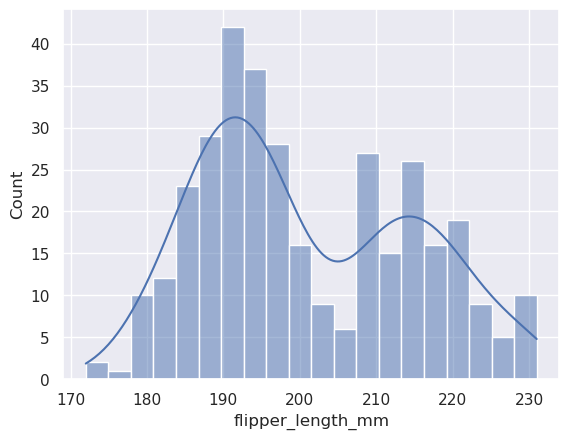

In [15]:
sns.histplot(data, x="flipper_length_mm", kde=True, bins=20)

### **Kernel Density Estimation (KDE) Plots**

<u>**Resources**</u>
- Density curves and their properties (https://www.youtube.com/watch?v=Txlm4ORI4Gs&list=PL0KQuRyPJoe6KjlUM6iNYgt8d0DwI-IGR&index=18)
- Wikipedia article on KDE (https://en.wikipedia.org/wiki/Kernel_density_estimation)
- How KDE is calculated (https://www.youtube.com/watch?v=_maAYlx68_o)

**`Continuous random variable:`** The set of possible values for a continuous random variable is an interval of real numbers. And a continuous random variable can take on any value in that particular range i.e, a continuous random variable represents a quantity that can take on an infinite number of possible values within a specified range. 

Unlike discrete random variables, which can only take on a countable number of distinct values, continuous random variables can assume any value within their defined range. Continuous random variables are usually measurements, such as height, weight, the amount of sugar in an orange, or the time required to run a mile. 

The probability that a continuous random variable will take on a particular value is zero. This is because there are an infinite number of possible values, and the probability of any one value occurring is infinitesimally small.


**`PDF (Probability Density Functions):`** PDF is used to describe the probability distribution of a continuous random variable i.e, the likelihood of the random variable taking on a specific value within a certain range.


**`Density Curve:`** A density curve is a graphical representation of the probability distribution of a continuous random variable. It is similar to a histogram, but instead of using bars to represent the frequencies of different values, it uses a smooth curve. It shows how the probability is spread out across the continuous range of possible values, and it's an essential tool for understanding and analyzing the distribution of continuous data. The area under the density curve within a specific interval represents the probability of the random variable falling within that interval.

**Note:** *Use density plots to show the distribution of a single variable (along with probability densities). Annotate the mean to draw attention to the center of the distribution.*

`->` When to use

Kernel Density Estimation (KDE) plots are useful for visualizing the probability density of a continuous dataset. Here's when to use them, when to avoid them, and some best practices:

- To get a sense of the underlying distribution of your data, especially when dealing with continuous variables. KDE can provide insights into the shape, central tendency, and spread of the data.
- For comparing multiple data distributions. You can overlay multiple KDE plots on the same graph to assess differences or similarities between datasets.
- For identifying modes (peaks) in the data. Bimodal or multimodal distributions, where data has multiple peaks, are often more apparent in KDE plots than in histograms.
- When you want to visualize the data while minimizing the impact of random noise or variations, KDE plots can be helpful since they provide a smoothed representation of the distribution.

`->` When to avoid

- With very small sample sizes, KDE plots may not provide meaningful insights and can be sensitive to the choice of kernel and bandwidth (since the sample can't be splited infinitely to replicate the KDE shape). In such cases, other methods like histograms or box plots might be more appropriate.
- KDE is designed for continuous data. For discrete data, histograms or bar plots may be more suitable for visualizing the data distribution.
- If your audience is not familiar with KDE plots or probability density functions, simpler visualizations like histograms or box plots may be easier for them to understand.

`->` Best practices

- Optimize the bandwidth parameter (it determines the level of smoothing in the KDE plot). A smaller bandwidth results in a more detailed but potentially noisy plot, while a larger bandwidth oversmooths the data. 